# Saving and Loading Models
In this notebook, I'll show you how to save and load models with PyTorch. This is important because you'll often want to load previously trained models to use in making predictions or to continue training on new data.

In [26]:

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper
import fc_model


In [27]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

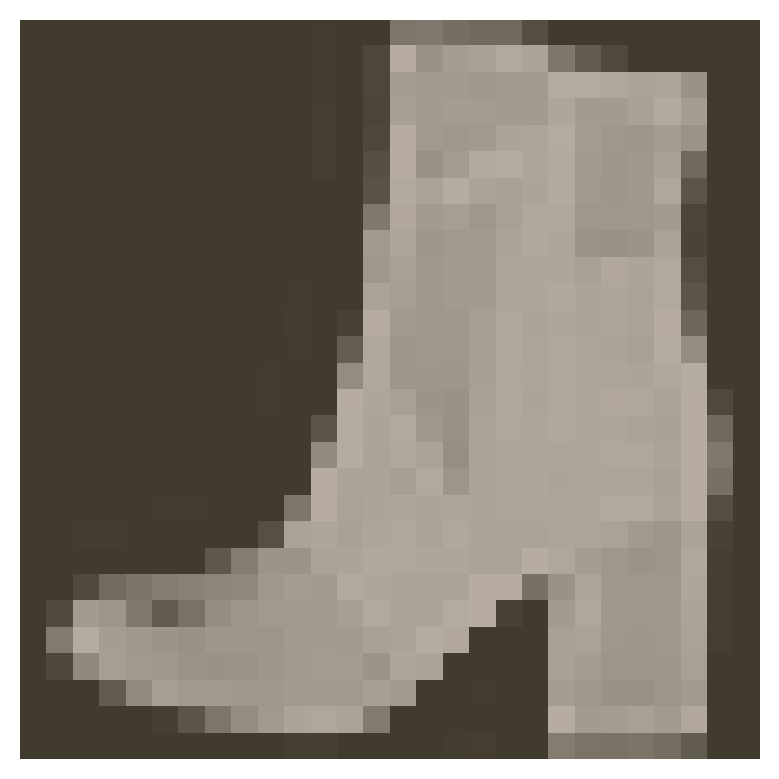

In [28]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);


# Train a network

To make things more concise here, I moved the model architecture and training code from the last part to a file called fc_model.

Importing this, we can easily create a fully-connected network with fc_model.Network, and train the network using fc_model.train.

I'll use this model (once it's trained) to demonstrate how we can save and load models.

In [29]:
# Create the network, define the criterion and optimizer

model = fc_model.Network(784, 10, [512, 256, 128])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [30]:
fc_model.train(model, trainloader, testloader, criterion, optimizer, epochs=2)

Epoch: 1/2..  Training Loss: 1.684..  Test Loss: 0.950..  Test Accuracy: 0.642
Epoch: 1/2..  Training Loss: 1.027..  Test Loss: 0.705..  Test Accuracy: 0.737
Epoch: 1/2..  Training Loss: 0.875..  Test Loss: 0.664..  Test Accuracy: 0.745
Epoch: 1/2..  Training Loss: 0.780..  Test Loss: 0.643..  Test Accuracy: 0.747
Epoch: 1/2..  Training Loss: 0.742..  Test Loss: 0.618..  Test Accuracy: 0.760
Epoch: 1/2..  Training Loss: 0.717..  Test Loss: 0.593..  Test Accuracy: 0.771
Epoch: 1/2..  Training Loss: 0.684..  Test Loss: 0.584..  Test Accuracy: 0.772
Epoch: 1/2..  Training Loss: 0.652..  Test Loss: 0.569..  Test Accuracy: 0.785
Epoch: 1/2..  Training Loss: 0.647..  Test Loss: 0.559..  Test Accuracy: 0.791
Epoch: 1/2..  Training Loss: 0.681..  Test Loss: 0.571..  Test Accuracy: 0.784
Epoch: 1/2..  Training Loss: 0.642..  Test Loss: 0.534..  Test Accuracy: 0.803
Epoch: 1/2..  Training Loss: 0.614..  Test Loss: 0.536..  Test Accuracy: 0.801
Epoch: 1/2..  Training Loss: 0.617..  Test Loss: 0.5

# Saving and loading networks

As you can imagine, it's impractical to train a network every time you need to use it. Instead, we can save trained networks then load them later to train more or use them for predictions.

The parameters for PyTorch networks are stored in a model's `state_dict`. We can see the state dict contains the weight and bias matrices for each of our layers.

In [31]:
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

hidden_layer1_weights = model.state_dict()['hidden_layers.0.weight']
hidden_layer1_biases = model.state_dict()['hidden_layers.0.bias']

print(hidden_layer1_biases,  hidden_layer1_weights)

Our model: 

 Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
) 

The state dict keys: 

 odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])
tensor([-0.0189,  0.0107, -0.0131, -0.0553, -0.0211, -0.0513, -0.0444, -0.0562,
        -0.0213,  0.0024,  0.0064, -0.0060,  0.0028, -0.0184, -0.0055, -0.0428,
        -0.0228, -0.0374, -0.0292, -0.0104, -0.0053, -0.0189, -0.0145, -0.0504,
        -0.0215, -0.0503, -0.0200, -0.0391, -0.0285, -0.0117, -0.0111, -0.0055,
         0.0186,  0.0212, -0.0218, -0.0335, -0.0296, -0.0201, -0.0116, -0.0020,
        -0.0296, -0.0228, 


The simplest thing to do is simply save the state dict with torch.save. For example, we can save it to a file 'checkpoint.pth'.

In [32]:

torch.save(model.state_dict(), 'checkpoint.pth')

O estado do modelo é salvo em um arquivo usando torch.save, e posteriormente pode ser carregado usando torch.load. (criou-se um arquivo checkpoint.pth)


Then we can load the state dict with torch.load.

In [33]:
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())

odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [34]:

model.load_state_dict(state_dict)

<All keys matched successfully>

No entanto, é importante notar que o carregamento do state_dict funciona apenas se a arquitetura do modelo for exatamente a mesma que a arquitetura no momento em que o estado foi salvo. Caso contrário, ocorrerá um erro.

In [35]:

# Try this
model = fc_model.Network(784, 10, [400, 200, 100])
# This will throw an error because the tensor sizes are wrong!
model.load_state_dict(state_dict)

RuntimeError: Error(s) in loading state_dict for Network:
	size mismatch for hidden_layers.0.weight: copying a param with shape torch.Size([512, 784]) from checkpoint, the shape in current model is torch.Size([400, 784]).
	size mismatch for hidden_layers.0.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([400]).
	size mismatch for hidden_layers.1.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([200, 400]).
	size mismatch for hidden_layers.1.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([200]).
	size mismatch for hidden_layers.2.weight: copying a param with shape torch.Size([128, 256]) from checkpoint, the shape in current model is torch.Size([100, 200]).
	size mismatch for hidden_layers.2.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([100]).
	size mismatch for output.weight: copying a param with shape torch.Size([10, 128]) from checkpoint, the shape in current model is torch.Size([10, 100]).

Para contornar isso, é necessário salvar não apenas o state_dict, mas também informações sobre a arquitetura da rede. Assim, um dicionário chamado checkpoint é criado, que contém o tamanho da entrada, o tamanho da saída, as camadas intermediárias e o state_dict. Esse dicionário é então salvo usando torch.save.

In [36]:

checkpoint = {'input_size': 784,
              'output_size': 10,
              'hidden_layers': [each.out_features for each in model.hidden_layers],
              'state_dict': model.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')

É fornecida uma função load_checkpoint para carregar o checkpoint e reconstruir o modelo com a mesma arquitetura usada durante o treinamento.

In [37]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = fc_model.Network(checkpoint['input_size'],
                             checkpoint['output_size'],
                             checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])
    
    return model

In [38]:

model = load_checkpoint('checkpoint.pth')
print(model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): Linear(in_features=400, out_features=200, bias=True)
    (2): Linear(in_features=200, out_features=100, bias=True)
  )
  (output): Linear(in_features=100, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


Portanto, o state_dict e o checkpoint são usados para salvar e carregar o estado treinado de uma rede neural, garantindo que a arquitetura do modelo seja reconstruída corretamente durante o carregamento. Isso é útil para reutilizar modelos treinados ou continuar o treinamento de onde parou.